In [1]:
import pandas as pd
wine_df = pd.read_csv('data/wine_cleared.csv')
import statistics

#### Корреляция — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

Например, при взрослении у человека меняются его показатели: рост становится больше, риск сердечно-сосудистых заболеваний — выше.

Мерой связи величин, мерой корреляции является **коэффициент корреляции**. Он может принимать значение от -1 до +1.

**Отрицательная корреляция, коэффициент корреляции < 0** говорит об обратной связи между переменными. При обратной связи увеличение одной из величин ведёт к закономерному уменьшению другой (других) величин. 

Например, чем больше сумма активного долга, тем меньше шанс в одобрении кредита.

**Положительная корреляция, коэффициент корреляции > 0** говорит о прямой связи между переменными. При прямой связи увеличение одной из величин ведёт к закономерному увеличению другой (других) величин. 

 Например, с увеличением возраста размер ноги человека увеличивается, и его рост увеличивается тоже.

**Коэффициент корреляции = 0** говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

Понимание корреляции приводит нас к понятию **мультиколлинеарности — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучениЯ**. 

Понять, почему это плохо для модели машинного обучения, вы сможете, когда приступите к обучению моделей. Но уже на этапе разведывательного анализа данных вы сможете выявить такие зависимости.

Как понять, существует ли сильная взаимозавимость признаков? Для этого существует примерная шкала степеней силы связи и коэффициента корреляции между признаками.

В таблице отражены основные силы связи между признаками.

Cила связи                              |  Значение коэффициента корреляции
- Отсутствие связи или очень слабая связь |    0…+/- 0.3
- Слабая связь	                          |   +/- 0.3…+/- 0.5
- Средняя связь	| +/- 0.5…+/- 0.7
- Сильная связь	| +/- 0.7…+/- 0.9
- Очень сильная или абсолютная связь | +/- 0.9…+/-1

##### Принято считать, что при коэффициенте корреляции +/-0,7 связь между признаками сильная и приводит к мультиколлинеарности.
_________________________________

Например, сложилась ситуация, когда в датасете были обнаружены признаки с очень сильной корреляцией. Мы знаем, что мультиколлинеарность вредит такой модели, поэтому на этапе проектирования признаков можем объединить эту пару признаков в один или удалить из этой пары один — тот, что менее важен. Важность признаков мы оцениваем позже, на этапе отбора признаков.

Так что для этапа корреляционного анализа достаточно делать и запоминать выводы о взаимосвязях признаков, чтобы на дальнейшем этапе разведывательного анализа данных правильно их обработать. Эти этапы мы изучим позже в курсе, в юнитах про разведывательный анализ данных.

Задание 3.3

Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas.

data.corr()

Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

In [2]:
wine_df.corr(numeric_only=True)
# 0.402137

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


Результатом функции *df.corr(*)* является матрица корреляции.

**Матрица корреляции — таблица, заголовками и строками которой являются названия признаков в датасете. На пересечении строк и столбцов находится значение коэффициента корреляции этих двух признаков.**

Данная матрица имеет значение 1 по главной диагонали, так как единица означает корреляцию признака с самим собой. Матрица является симметричной. 

![image.png](https://lms-cdn.skillfactory.ru/assets/courseware/v1/e4c6d55ed6eb2ba5bcdfe6684820f11f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-2-3.png)

*Визуализация матрицы корреляций на примере датасета о пассажирах «Титаника». Источник: kaggle*

На рисунке вы можете увидеть визуализированную матрицу к одному из соревнований на kaggle. Наибольшая связь наблюдается в паре признаков age и age_bucket — 0.98, что по шкале корреляции является очень сильной связью и приводит к мультиколлинеарности признаков. Скорее всего, один из признаков будет исключён из датасета.

*Подобную матрицу мы научимся строить в одном из следующих юнитов, посвящённых визуализации корреляций.*

В нашей матрице датасета винных обзоров отражено всего два признака — points, price.  На пересечении признаков мы видим значение коэффициента корреляции между признаками points и price.

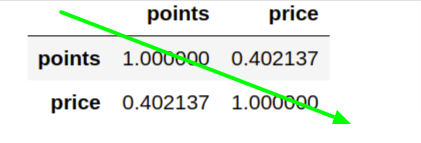

*Матрица корреляции. построенная при помощи df.corr(). Зелёным выделена главная диагональ.*

Причина в том, что рассчитать коэффициент корреляции мы можем только в том случае, когда признак имеет численное выражение. Как мы выяснили ранее, остальные признаки — в строковом формате, и расчёт коэффициента корреляции невозможен. Для этого необходимо провести кодирование признака, которое мы будем изучать далее.

Поскольку наша задача — предсказание рейтинга (баллов) за вино на основании признаков в датасете, можем ли мы с помощью корреляции понять, влияет ли, например, цена за бутылку в определении рейтинга вина?

                                               Нет!

Корреляция и причинно-следственная связь — это понятия, которые чаще всего ошибочно приравниваются друг к другу. Понимание корреляции важно для разведывательного анализа и помогает делать правильные выводы. 

                                           ЛОЖНАЯ КОРРЕЛЯЦИЯ

Рассмотрим, почему корреляция не подразумевает причинно-следственных связей, на популярном примере.

________________________________
*Продажи мороженого коррелируют с убийствами!*

*По мере роста или падения продаж замороженного десерта соответственно растёт или уменьшается количество убийств. Является ли потребление замороженного десерта причиной смерти людей?*
______________________________________
Нет. Эти две вещи взаимосвязаны, но это не значит, что одна вызывает другую.

Этот случай можно назвать совпадением, и чаще всего корреляция наблюдается именно в таких ситуациях. А иногда нам просто не хватает данных, чтобы уловить причину связи между переменными.

В некоторых случаях участвуют скрытые факторы. Например, в примере с мороженым улучшение погоды вызывает рост продаж десерта, а большое количество людей на улицах создаёт благоприятные условия для убийц.

Нет причинно-следственной связи между убийствами и продажей мороженого, а наличие третьего фактора — хорошей погоды — объясняет эти связи. Этот случай называется ложной корреляцией.

Существует огромное количество подобных исследований с удивительными связями. 